In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv("D:\\DATA_science\\DATA_science assignment\\Clustering\\EastWestAirlines.csv")

In [4]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
data.iloc[:,1:];

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

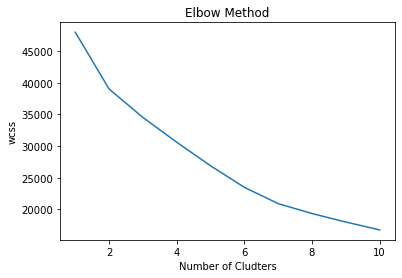

In [8]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cludters')
plt.ylabel('wcss')
plt.show()

In [23]:
cluster_new=KMeans(2,random_state=40)
cluster_new.fit(scaled_data)

KMeans(n_clusters=2, random_state=40)

In [24]:
cluster_new.labels_;

In [25]:
data['clusterid_new']=cluster_new.labels_

In [26]:
cluster_new.cluster_centers_;

In [27]:
data.groupby('clusterid_new').count()#.agg(['mean']).reset_index()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusterid_new,,,,,,,,,,,,
0,1327,1327,1327,1327,1327,1327,1327,1327,1327,1327,1327,1327
1,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672
